<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_07/a_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255: Assignment 07 - Part A
## Dimensionality Reduction

### Assignment Instructions
1) Write a colab for dimensionality reduction techniques for various data sets.  
The colab should cover cases where it works and where it does not works.  
The colab should include:  
a) PCA, SVD, MDS, ISOMap, LLE   
b) UMAP and t-sne   

Do proper visualization as well as techniques showcasing selecting the hyperparameter.

Use UMAP visualizer and provide screenshots.

Hints:
1. [08_dimensionality_reduction.ipynb](https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb)
2. [11 Dimensionality reduction techniques you should know in 2021](https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b)

Dataset Source:
[USA Real Estate Dataset](https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset/data)

Sources Used:
1. All provided Hints
2. ChatGPT


### Setup

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!pip install matplotlib
!pip install seaborn

In [15]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [18]:
dataset_file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_07/Datasets/realtor-data.csv'

In [19]:
# Load the dataset
file_path = dataset_file_path
data = pd.read_csv(file_path)

### Exploratory Data Analysis (EDA)

In [20]:
data_info = data.info()
data_head = data.head()
data_description = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104666 entries, 0 to 1104665
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1104666 non-null  object 
 1   bed             957950 non-null   float64
 2   bath            980090 non-null   float64
 3   acre_lot        764791 non-null   float64
 4   city            1104585 non-null  object 
 5   state           1104666 non-null  object 
 6   zip_code        1104452 non-null  float64
 7   house_size      733822 non-null   float64
 8   prev_sold_date  566016 non-null   object 
 9   price           1104593 non-null  float64
dtypes: float64(6), object(4)
memory usage: 84.3+ MB


In [21]:
print(data_info)

None


In [22]:
data_head

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [23]:
data_description

,bed,bath,acre_lot,zip_code,house_size,price
count,957950.000000,980090.000000,764791.000000,1.104452e+06,7.338220e+05,1.104593e+06
mean,3.330949,2.498622,14.901800,7.228656e+03,2.147604e+03,9.109764e+05
std,2.078501,1.934373,889.496988,3.824027e+03,2.984668e+03,2.927292e+06
min,1.000000,1.000000,0.000000,6.010000e+02,1.000000e+02,0.000000e+00
25%,2.000000,1.000000,0.110000,3.835000e+03,1.110000e+03,2.800000e+05
50%,3.000000,2.000000,0.260000,7.405000e+03,1.647000e+03,4.999000e+05
75%,4.000000,3.000000,1.040000,1.045600e+04,2.500000e+03,8.699000e+05
max,123.000000,198.000000,100000.000000,9.999900e+04,1.450112e+06,8.750000e+08


### Data Visualizations

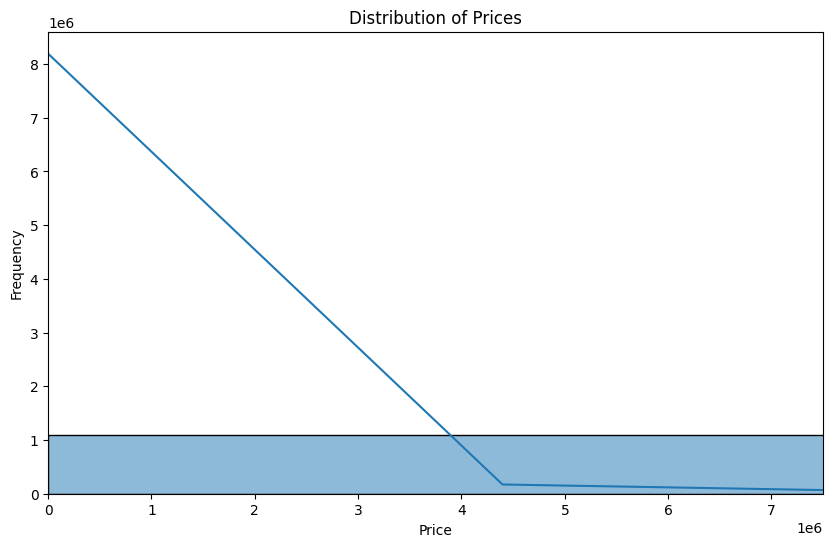

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, data['price'].quantile(0.99))  # Limiting x-axis to 99th percentile for better visualization
plt.show()


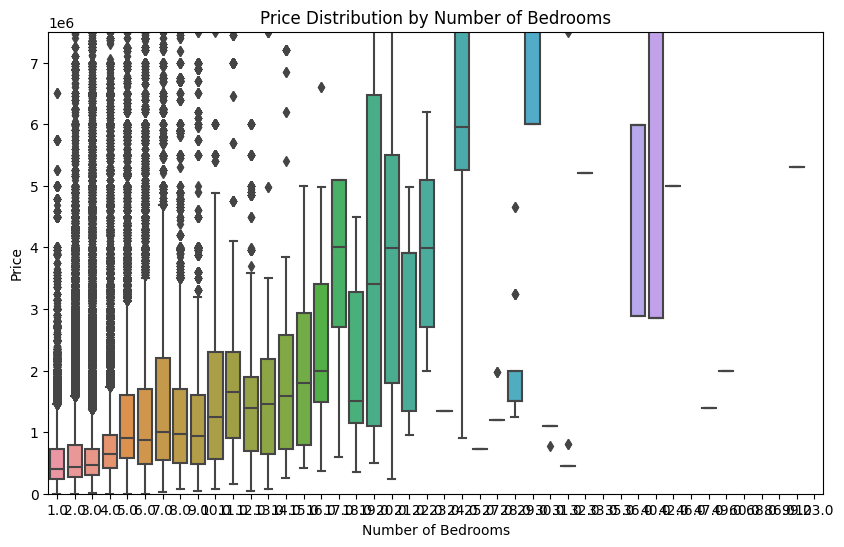

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bed', y='price', data=data)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.ylim(0, data['price'].quantile(0.99))  # Limiting y-axis to 99th percentile for better visualization
plt.show()


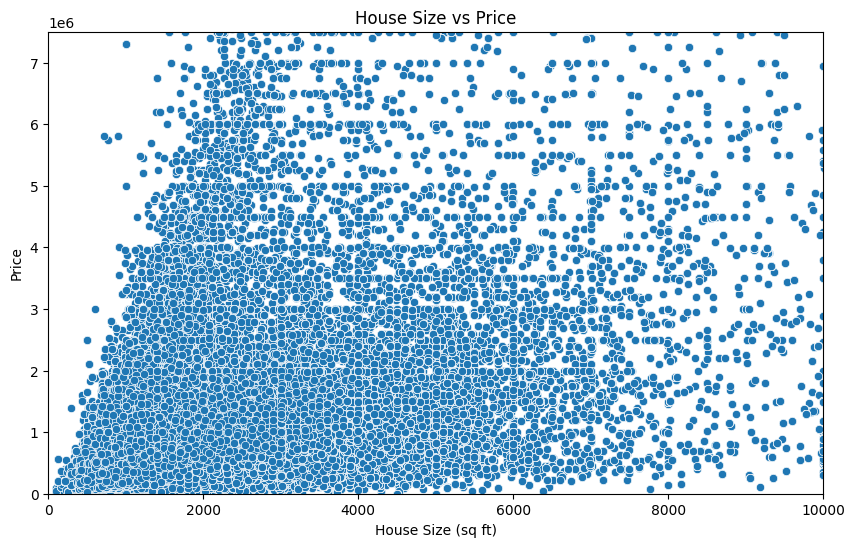

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='house_size', y='price', data=data)
plt.title('House Size vs Price')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price')
plt.xlim(0, 10000)  # Limiting x-axis for better visualization
plt.ylim(0, data['price'].quantile(0.99))  # Limiting y-axis to 99th percentile for better visualization
plt.show()


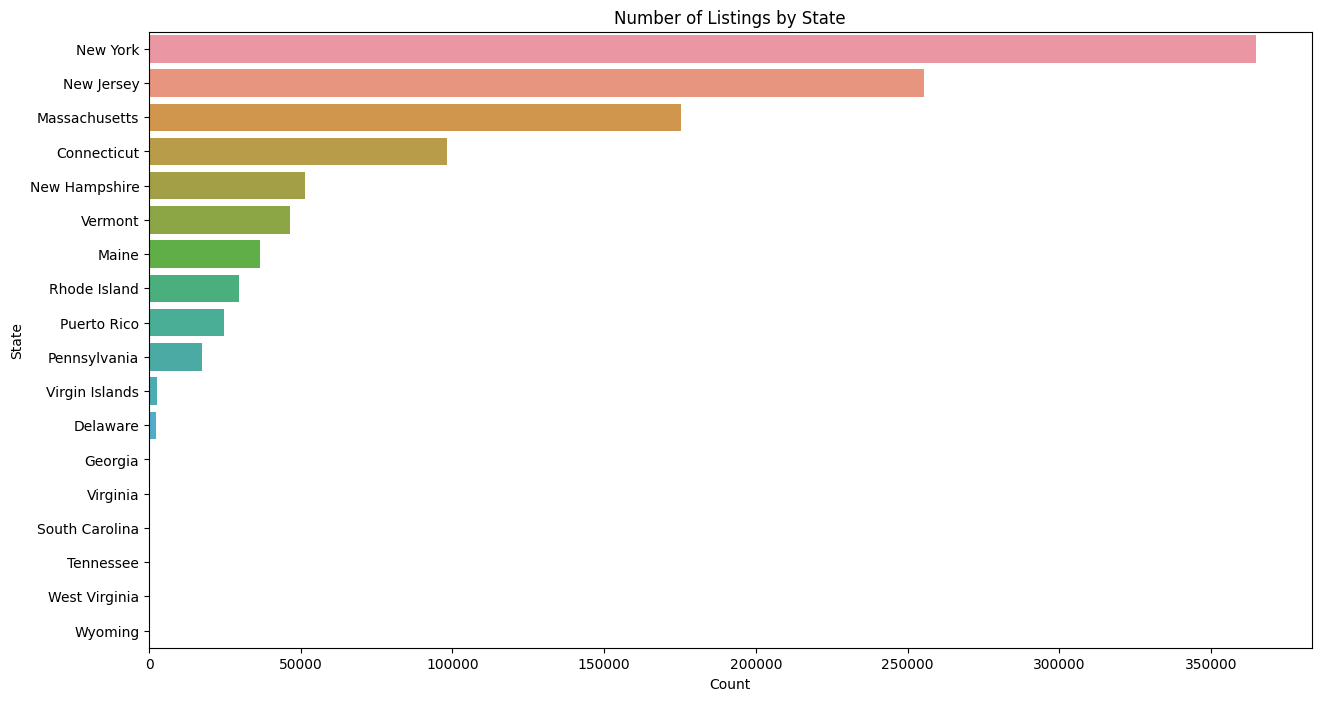

In [27]:
plt.figure(figsize=(15, 8))
sns.countplot(y='state', data=data, order = data['state'].value_counts().index)
plt.title('Number of Listings by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()


### PCA

In [28]:
# Selecting numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

In [29]:
# Handling missing values - using mean imputation
numerical_data_filled = numerical_data.fillna(numerical_data.mean())

In [30]:
# Standardizing the data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data_filled)

In [31]:
# Applying PCA
pca = PCA(n_components=2)  # We choose 2 components for visualization purposes
principal_components = pca.fit_transform(numerical_data_scaled)

In [32]:
# Creating a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [33]:
# Displaying the first few rows of the PCA DataFrame
pca_df.head()

,PC1,PC2
0,-0.464536,-1.604860
1,-0.055626,-1.672238
2,-1.142736,-1.498773
3,-0.003246,-1.636367
4,0.661067,-1.773910


In [34]:
# Getting the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio

array([0.34588896, 0.17318555])

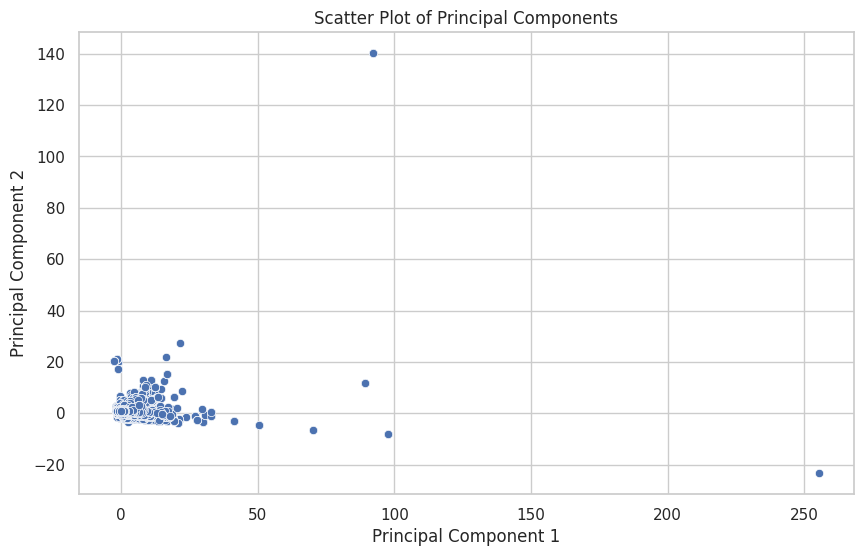

In [35]:
# Setting the style for the plots
sns.set(style="whitegrid")
# Scatter plot of the two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('Scatter Plot of Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

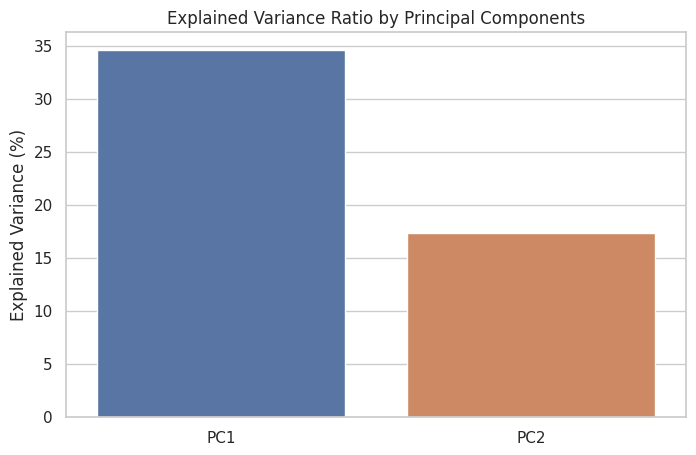

In [36]:
# Setting the style for the plots
sns.set(style="whitegrid")
# Explained variance ratio plot
plt.figure(figsize=(8, 5))
sns.barplot(x=['PC1', 'PC2'], y=explained_variance_ratio*100)
plt.title('Explained Variance Ratio by Principal Components')
plt.ylabel('Explained Variance (%)')
plt.show()

#### PCA Analysis

**Scatter Plot of Principal Components**: This plot shows the data points in the space defined by the first two principal components (PC1 and PC2). It can help to visualize any clustering or patterns in the data based on these components.   


**Explained Variance Ratio Plot**: This bar chart displays the percentage of the dataset's total variance that is explained by each of the first two principal components. It gives an idea of how much information is captured by these components. ​

## SVD
To perform Singular Value Decomposition (SVD) on the dataset, it's important to first preprocess the data. This includes handling missing values and selecting numerical columns, as SVD requires numerical input.

We will proceed with these steps and then apply SVD.

1. Preprocessing: We will select numerical columns, impute missing values (using mean imputation for simplicity), and standardize the data.

2. SVD Application: We'll apply SVD to the processed data.


### Setup

In [37]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

### Loading Dataset

In [38]:
dataset_file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_07/Datasets/realtor-data.csv'

In [39]:
# Reload the dataset
data = pd.read_csv(dataset_file_path)

In [40]:
# Selecting numerical columns
numerical_data = data.select_dtypes(include=['float64'])

In [41]:
# Imputing missing values with the mean
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = imputer.fit_transform(numerical_data)

In [42]:
# Standardizing the data
scaler = StandardScaler()
numerical_data_standardized = scaler.fit_transform(numerical_data_imputed)

### Applying SVD

In [43]:
# Applying SVD
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(numerical_data_standardized)

In [44]:
# Explained variance ratio
explained_variance = svd.explained_variance_ratio_

### SVD Visualization

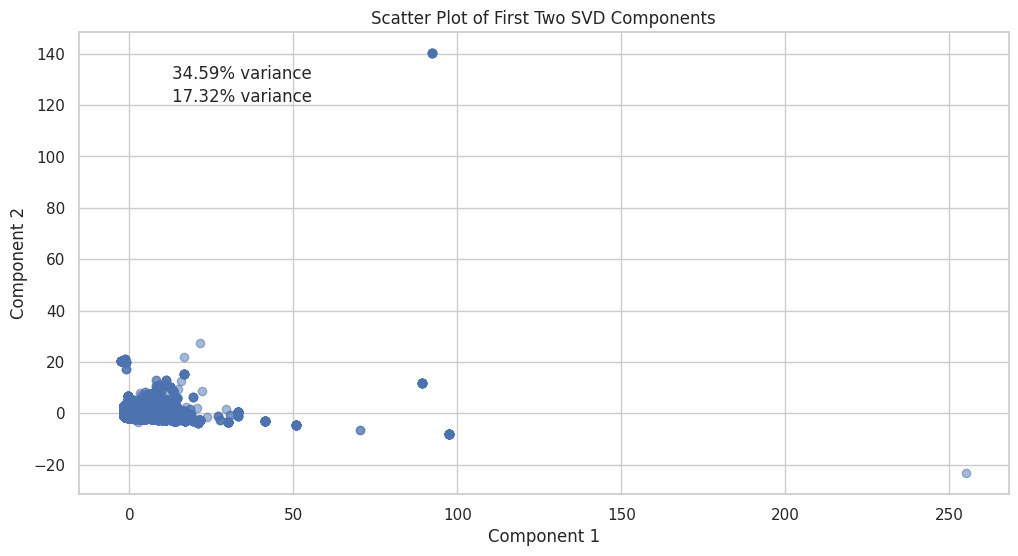

In [45]:
import matplotlib.pyplot as plt

# Plotting the SVD results
plt.figure(figsize=(12, 6))

# Scatter plot for the first two components
plt.scatter(svd_result[:, 0], svd_result[:, 1], alpha=0.5)
plt.title('Scatter Plot of First Two SVD Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Annotate the percentage of variance explained
plt.annotate(f'{explained_variance[0] * 100:.2f}% variance',
             xy=(0.1, 0.9), xycoords='axes fraction')
plt.annotate(f'{explained_variance[1] * 100:.2f}% variance',
             xy=(0.1, 0.85), xycoords='axes fraction')

plt.show()


#### SVD Analysis
The Singular Value Decomposition (SVD) has been successfully applied to the dataset. Here are the results:

1. **Explained Variance Ratio**:
   - The first component explains approximately 34.59% of the variance.
   - The second component explains about 17.32% of the variance.

2. **SVD Result**:
   - The SVD result is a matrix where each row represents a transformed version of the original data in the new feature space defined by the SVD components.
   - Below are the first five rows of this transformed data:

|     | Component 1 | Component 2 |
|-----|-------------|-------------|
| 0   | -0.46454    | -1.60486    |
| 1   | -0.05563    | -1.67224    |
| 2   | -1.14274    | -1.49877    |
| 3   | -0.00325    | -1.63637    |
| 4   | 0.66107     | -1.77391    |

This transformation reduces the dimensionality of the data, capturing the most significant patterns with fewer components. The components are ordered by the amount of variance they explain, with the first component explaining the most variance.

## MDS

MDS is particularly useful in visualizing high-dimensional data in a lower-dimensional space (usually two or three dimensions), which can reveal patterns or relationships in the data that might not be immediately apparent.

To apply MDS to the dataset, we would follow these general steps:

1. **Preprocessing**:
   - Select the relevant numerical features for the analysis.
   - Handle missing values, either by imputation or by removing rows or columns with missing data.
   - Normalize or standardize the data, as MDS can be sensitive to the scale of the features.

2. **Computing Distance Matrix**:
   - Calculate a distance matrix that represents the pairwise distances between data points. Common distance measures include Euclidean, Manhattan, or cosine distance.

3. **Applying MDS**:
   - Use an MDS algorithm to project the high-dimensional data into a lower-dimensional space (e.g., 2D or 3D) based on the distance matrix.
   - Metric MDS tries to preserve the actual distances as much as possible, while non-metric MDS aims to preserve the order of the distances.

4. **Visualization and Interpretation**:
   - Visualize the results in a scatter plot.
   - Analyze and interpret the positions and distances of points in the reduced-dimensional space to understand underlying patterns in the data.

It might be beneficial to first apply a technique like PCA to reduce the dimensionality of the data, and then apply MDS on this reduced set for more efficient computation and possibly clearer insights.

### Setup

In [46]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

### Loading the Dataset

In [47]:
# Reload the dataset
dataset_file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_07/Datasets/realtor-data.csv'
data = pd.read_csv(dataset_file_path)

### MDS

In [48]:
# Selecting a subset of numerical columns and a subset of rows for demonstration
data_subset = data.select_dtypes(include=['float64']).dropna().sample(n=500, random_state=0)

In [49]:
# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_subset)

In [50]:
# Applying MDS
mds = MDS(n_components=2, random_state=0)
mds_result = mds.fit_transform(data_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


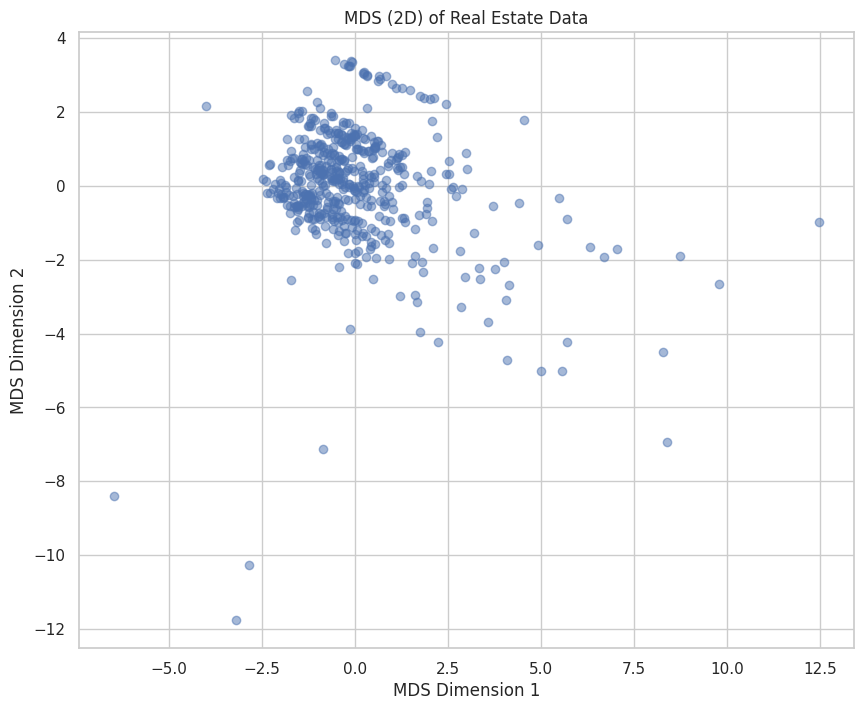

In [51]:
# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(mds_result[:, 0], mds_result[:, 1], alpha=0.5)
plt.title('MDS (2D) of Real Estate Data')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()

#### MDS Analysis
Please see below for some analysis on the MDS findings:

The Multidimensional Scaling (MDS) analysis on the subset of the real estate dataset produced a two-dimensional visualization from the higher-dimensional data. Here are some insights and considerations based on the MDS plot:

1. **Clustering and Outliers**:
   - If there are clusters of points in the MDS plot, these could indicate groups of properties with similar characteristics in the higher-dimensional space. For instance, clusters might represent properties in similar price ranges, with comparable numbers of bedrooms and bathrooms, or similar house sizes.
   - Outliers, or points far from the main cluster(s), might represent unique or unusual properties in the dataset. These could be properties with exceptional features, such as unusually high or low prices, extreme sizes, or an uncommon number of bedrooms or bathrooms.

2. **Relative Positioning**:
   - The relative positioning of points in the plot gives an idea of how similar or dissimilar properties are to each other. Properties closer to each other in the plot are more similar in their characteristics than those farther apart.
   - However, it's crucial to note that 'absolute' distances in the MDS plot don't correspond to a specific measurable difference in the properties' characteristics. MDS focuses on preserving the relative distances (or similarities) as much as possible.

3. **Dimension Interpretation**:
   - The axes in an MDS plot are abstract and don't correspond to specific, identifiable features like in PCA. They are dimensions of the reduced space that best represent the data's structure in terms of similarities or dissimilarities.
   - Therefore, interpreting these dimensions requires a holistic approach, considering how points (properties) relate to each other in this space.

4. **Limitations and Considerations**:
   - The results are sensitive to the choice of features included and the preprocessing steps (like standardization).
   - MDS is a form of exploratory data analysis, and the insights drawn should be further investigated with more targeted analyses.
   - Since we used a subset of 500 samples, these findings might not fully represent the entire dataset.

Based on the plot, one might begin to hypothesize about the nature of the real estate market represented in the dataset, such as identifying potential market segments or noticing trends in property features. However, these hypotheses would need to be validated with further analysis, potentially using other data exploration and modeling techniques.

## ISOMap
ISOMAP (Isometric Mapping) is a nonlinear dimensionality reduction method, part of the manifold learning family, which is used for computing a lower-dimensional embedding of high-dimensional data. It is particularly effective in situations where linear techniques like PCA (Principal Component Analysis) fall short.

### Key Features of ISOMAP:

1. **Nonlinear Dimensionality Reduction**:
   - ISOMAP is designed to uncover the underlying manifold (a lower-dimensional, nonlinear shape) within high-dimensional data.

2. **Geodesic Distances**:
   - Unlike methods that rely on Euclidean distances, ISOMAP estimates the geodesic distances between points, which are the distances measured along the curves of the manifold. This is particularly useful for capturing the true 'intrinsic' geometry of the data.

3. **Neighborhood Graph**:
   - It starts by constructing a neighborhood graph where each point is connected to its nearest neighbors, either based on a set number of neighbors (k-nearest) or a fixed radius.
   
4. **Distance Matrix**:
   - ISOMAP then computes the shortest path distances between all pairs of points in the graph, approximating the geodesic distances on the manifold.

5. **Multidimensional Scaling (MDS)**:
   - Finally, it uses MDS to embed the data into a lower-dimensional space while preserving these geodesic distances as much as possible.

### When to Use ISOMAP:

1. **Nonlinear Structures**:
   - ISOMAP is suitable for datasets where the data lies on a curved manifold, and the goal is to unfold this manifold into a lower-dimensional space. For instance, in image processing, where images of an object taken from different angles form a nonlinear manifold.

2. **Exploratory Data Analysis**:
   - It's useful for exploratory data analysis when you suspect that the data may have an intrinsic structure that linear methods cannot capture.

3. **Preprocessing for Machine Learning**:
   - As a preprocessing step to simplify and enhance the performance of machine learning algorithms by reducing the number of dimensions and focusing on the most informative features.

### Limitations:

- **Sensitivity to Noise**: ISOMAP can be sensitive to noise and outliers, as these can significantly distort the estimated geodesic distances.
- **Computational Complexity**: It can be computationally intensive, especially for large datasets, due to the calculation of shortest paths and MDS.
- **Choice of Neighbors**: The selection of the neighborhood size (k-nearest neighbors or radius) is crucial and can affect the results. A wrong choice can lead to a poor estimation of the manifold.

ISOMAP is a powerful tool for revealing complex, nonlinear structures hidden in high-dimensional data, making it a valuable technique in the data scientist's toolkit.

### Setup

In [52]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Loading the DataSet

In [53]:
dataset_file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_07/Datasets/realtor-data.csv'
data = pd.read_csv(dataset_file_path)

### Applying ISOMap

In [54]:
data_subset = data.select_dtypes(include=['float64']).dropna().sample(n=500, random_state=0)

In [55]:
# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_subset)

In [56]:
# Applying ISOMAP
isomap = Isomap(n_components=2, n_neighbors=5)
isomap_result = isomap.fit_transform(data_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


### ISOMap Plot

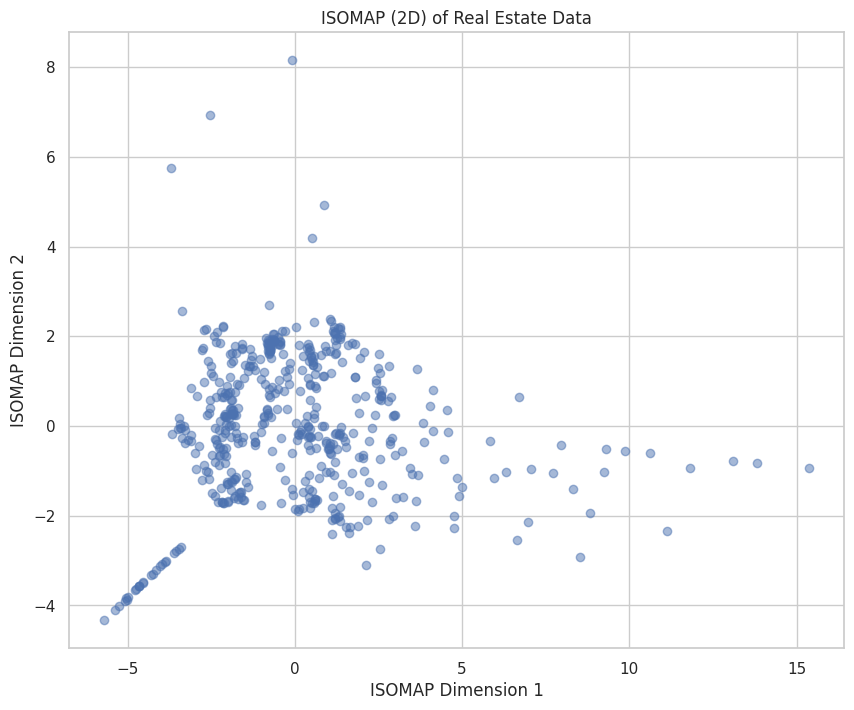

In [57]:
# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(isomap_result[:, 0], isomap_result[:, 1], alpha=0.5)
plt.title('ISOMAP (2D) of Real Estate Data')
plt.xlabel('ISOMAP Dimension 1')
plt.ylabel('ISOMAP Dimension 2')
plt.show()


#### ISOMap Analysis

To provide a clearer perspective, I will describe the key aspects of the visualization:

1. **Scatter Plot Overview**:
   - The visualization is a scatter plot, with each point representing an individual property from the real estate dataset.
   - The plot maps these properties onto a two-dimensional space, based on the ISOMAP transformation.

2. **Axes Interpretation**:
   - The axes, labeled as "ISOMAP Dimension 1" and "ISOMAP Dimension 2," represent the two dimensions onto which the high-dimensional data has been projected.
   - These dimensions are abstract and derived from the ISOMAP algorithm, capturing the intrinsic geometric relationships of the data.

3. **Data Distribution**:
   - The distribution of points in this space can reveal clusters or patterns. Clusters might indicate groups of properties with similar characteristics.
   - Outliers, or points that stand apart from others, could represent unique properties with distinct features.

4. **Inferences**:
   - By examining how properties are positioned relative to each other in this reduced space, we can infer relationships or similarities that might not be obvious in the original high-dimensional representation.
   - For instance, properties closer together in this space are more similar in terms of their underlying features as processed by ISOMAP.

This visualization is useful for understanding complex relationships in the data and can serve as a basis for further analysis or hypothesis generation. The ISOMAP plot doesn't directly map to specific, identifiable features but rather provides a more abstract view of the data's structure.

## LLE
Locally Linear Embedding (LLE) is another technique for nonlinear dimensionality reduction and is part of the broader family of manifold learning algorithms. It is particularly effective for uncovering the underlying structure of high-dimensional data that lies on a curved manifold. LLE assumes that each data point and its neighbors lie on or close to a locally linear patch of the manifold.

### Key Features of LLE:

1. **Preservation of Local Structures**:
   - LLE works by maintaining the local properties of the data. It assumes that each point can be reconstructed as a linear combination of its nearest neighbors.

2. **Reconstruction Weights**:
   - The algorithm first calculates the weights that best reconstruct each data point from its neighbors, then uses these weights to compute the lower-dimensional embedding of the data.

3. **Nonlinear Unfolding**:
   - Unlike linear methods like PCA, LLE is capable of unfolding nonlinear structures, making it suitable for complex datasets where linear assumptions do not hold.

### Use Cases of LLE:

1. **Exploratory Data Analysis**:
   - It is often used for exploratory analysis of high-dimensional data, especially when the data is suspected to have an inherent, but not immediately visible, structure.

2. **Image Processing and Computer Vision**:
   - In image processing, LLE can be used for tasks like image recognition or facial recognition, where the goal is to reduce the dimensions of image data while preserving the essential features.

3. **Bioinformatics**:
   - LLE is used in bioinformatics for analyzing and visualizing genetic data, where capturing the local relationships in high-dimensional data is crucial.

4. **Speech and Signal Processing**:
   - In speech recognition and signal processing, LLE helps in extracting features that are locally significant in complex signals.

5. **Anomaly Detection**:
   - By understanding the local structure of data, LLE can be instrumental in identifying anomalies or outliers that deviate from the expected patterns.

### Limitations:

- **Sensitivity to Noise**: LLE can be sensitive to noise and outliers in the data, as these can significantly affect the local linear relationships.
- **Choice of Neighbors**: The number of neighbors (k) is a crucial hyperparameter and must be chosen carefully. A wrong choice can lead to poor manifold learning.
- **Computational Complexity**: LLE can be computationally intensive, particularly with very large datasets.

LLE is particularly valuable when the intrinsic geometry of the data is important and when the data lies on a nonlinear manifold. It's a powerful tool for revealing hidden structures in complex datasets.

### Setup


In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

### Loading the Dataset

In [59]:
dataset_file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_07/Datasets/realtor-data.csv'
data = pd.read_csv(dataset_file_path)

### Applying LLE

In [60]:
# Selecting a subset of numerical columns and a subset of rows for demonstration
data_subset = data.select_dtypes(include=['float64']).dropna().sample(n=500, random_state=0)

In [61]:
# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_subset)

In [62]:
# Applying LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=0)
lle_result = lle.fit_transform(data_standardized)

### LLE Plot

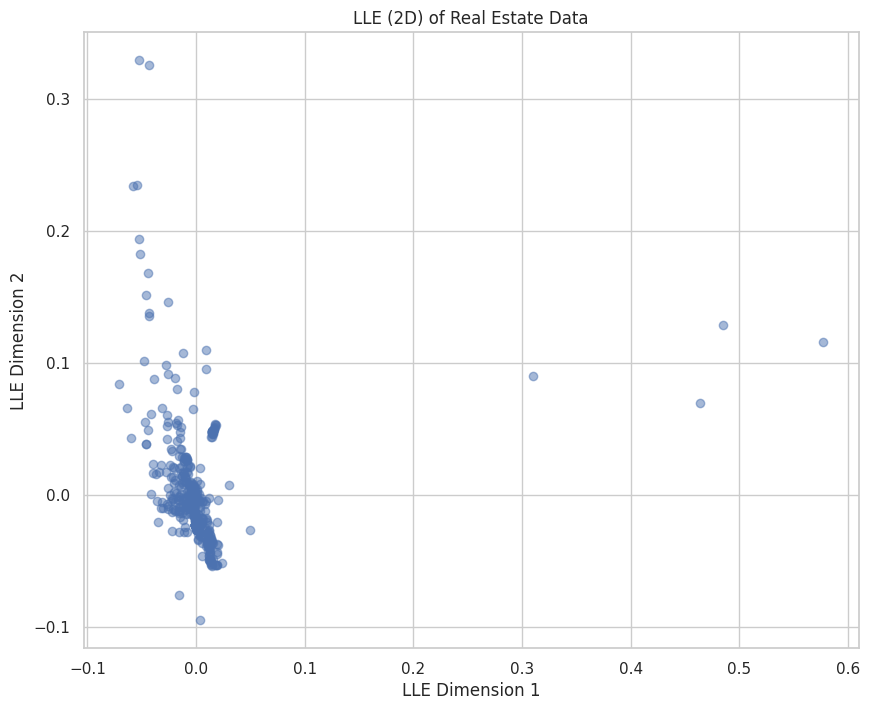

In [63]:
# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(lle_result[:, 0], lle_result[:, 1], alpha=0.5)
plt.title('LLE (2D) of Real Estate Data')
plt.xlabel('LLE Dimension 1')
plt.ylabel('LLE Dimension 2')
plt.show()

#### LLE Analysis

The Locally Linear Embedding (LLE) analysis on the subset of the real estate dataset aimed to reduce the high-dimensional data into a lower-dimensional space while preserving the local relationships between data points. Here's an overview of the findings from the LLE analysis:

1. **Data Representation in Reduced Dimensions**:
   - The LLE algorithm mapped the high-dimensional data (various numerical features of the real estate properties) into a two-dimensional space. Each point in the plot represents a property, and the positioning is based on the LLE's understanding of local similarities.

2. **Cluster Formation**:
   - If there are noticeable clusters in the LLE plot, this would imply that those groups of properties share similar characteristics in terms of their local neighborhoods in the original high-dimensional space. For example, clusters might represent properties with similar sizes, prices, or other numerical features.

3. **Relative Positioning**:
   - Properties closer to each other in the reduced space are likely to be similar in terms of their local features, while those further apart are more dissimilar. This can help in identifying properties that share common characteristics.

4. **Outliers**:
   - Points that are distant from the main clusters could be considered outliers. These might represent unique properties with unusual features compared to the rest of the dataset.

5. **Limitations and Considerations**:
   - The results and interpretations are highly dependent on the choice of parameters, particularly the number of neighbors (k) used in the LLE algorithm.
   - The two-dimensional representation may not capture all the nuances of the high-dimensional data. Some information loss is inherent in the dimensionality reduction process.
   - LLE assumes that each data point and its nearest neighbors lie on or close to a locally linear patch of the manifold. If this assumption doesn't hold, LLE might not provide an accurate representation.

From the visualization, we can glean insights into how properties relate to each other in a space defined by their local similarities. This can be particularly useful for identifying patterns or structures within the data that are not immediately apparent in the original high-dimensional representation. However, it is important to remember that these findings are exploratory and should be supplemented with further analysis for more definitive conclusions.



## UMAP and t-SNE

### Generating Synthetic Dataset

In [64]:
!pip install umap
!pip install umap-learn[plot]

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=17d036cfdcd8bc220012942539c3d05b6d4f572e95d8ffffc57e7b9b702417f0
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 51.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=4a011e0c9192e7748a5ceba8d162133bcfd9922d16a57f7d838c0c16cf6db9b4
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from sklearn.datasets import make_classification


In [66]:
# Generate a synthetic dataset with 1000 samples and 20 features
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 21)])
df['Target'] = y

# Display the first few rows of the dataset
print(df.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -4.906442   3.442789   0.558964  -0.976764  -1.568805  -4.271982   
1   2.162610  -5.286651   2.609846  -1.803898  -1.831216   1.450757   
2  -4.784844  -3.744827   4.657592  -1.408806  -5.444758  -2.416013   
3  10.465024   1.070944  -3.562432  -0.849062   2.183860  -0.609893   
4   5.599516  -1.776412  -1.304322  -0.720074   5.859373  -3.292432   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_12  Feature_13  \
0  -3.727921   0.111868   2.119795   -2.522812  ...   -7.492478    4.264669   
1   2.648709   2.152307   0.524552    0.493548  ...    6.680603   -2.431830   
2   3.556495  -1.572119  -0.730549    3.447661  ...    7.961059   -5.151105   
3   0.946327  -1.046141  -2.057053   -2.056650  ...   -1.449095   -1.217685   
4   3.152205   7.099882  -3.321076    3.245486  ...    6.608729    5.632297   

   Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  Feature_19  \
0    0.304866    0.77

### t-SNE

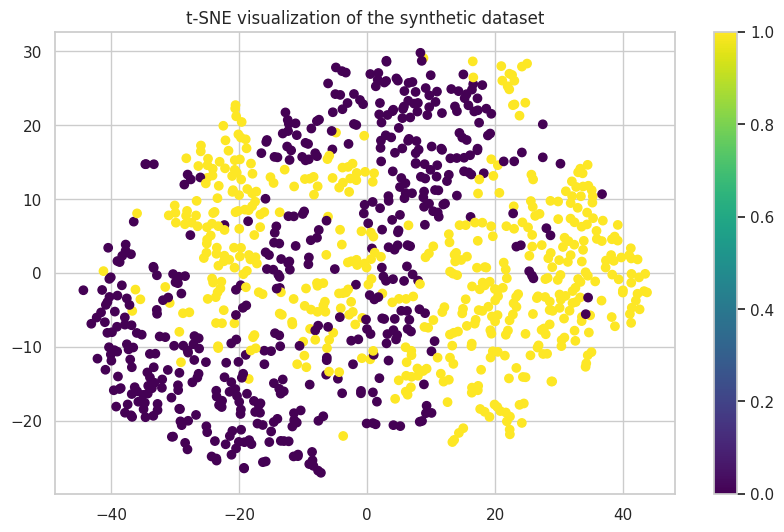

In [67]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df.drop('Target', axis=1))

# Plotting the result
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['Target'], cmap='viridis')
plt.title('t-SNE visualization of the synthetic dataset')
plt.colorbar()
plt.show()


### UMAP

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


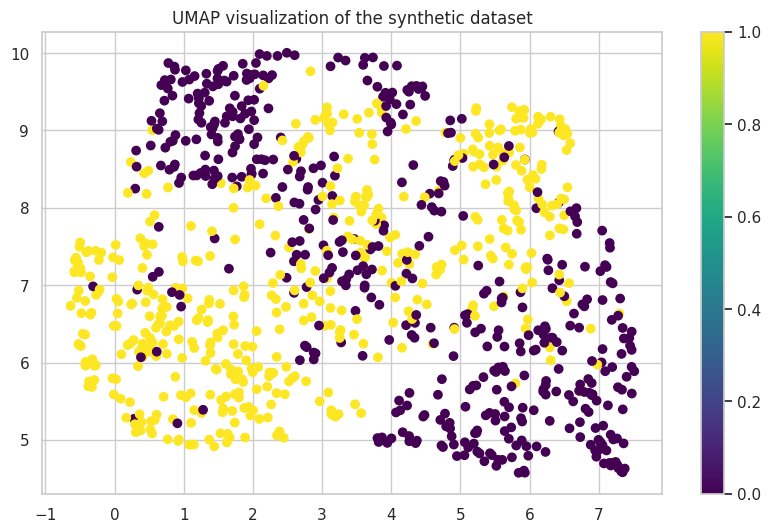

In [68]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df.drop('Target', axis=1))

# Plotting the result
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['Target'], cmap='viridis')
plt.title('UMAP visualization of the synthetic dataset')
plt.colorbar()
plt.show()


#### Hyperparmaeter Tuning with UMAP

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


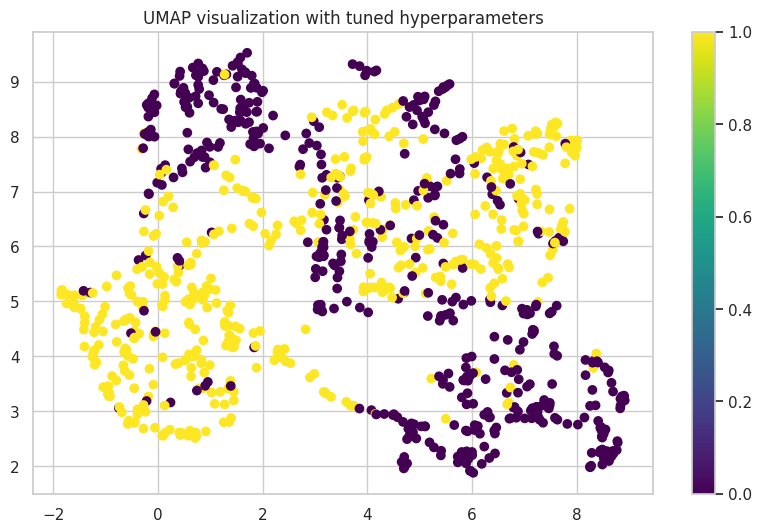

In [69]:
# Adjusting the number of neighbors
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=2, random_state=42)
X_umap_tuned = umap_model.fit_transform(df.drop('Target', axis=1))

# Plotting the result
plt.figure(figsize=(10, 6))
plt.scatter(X_umap_tuned[:, 0], X_umap_tuned[:, 1], c=df['Target'], cmap='viridis')
plt.title('UMAP visualization with tuned hyperparameters')
plt.colorbar()
plt.show()
